## CIFAR-100 Image Classification

Your task is to apply the concepts and techniques learned in this Fashion-MNIST project to the CIFAR-100 dataset. CIFAR-100 is a dataset consisting of 60,000 32x32 color images in 100 classes, with 600 images per class. There are 50,000 training images and 10,000 test images.

Follow these steps:

1.  **Dataset Setup:**
    *   Load the CIFAR-100 dataset.
    *   Preprocess the data (normalize pixel values, one-hot encode labels). Remember that CIFAR-100 images are 32x32 color images, so the input shape will be different from Fashion-MNIST.
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Adapt the ANN and CNN model architectures for the CIFAR-100 dataset. Consider that CIFAR-100 images are color (3 channels) and have a different resolution (32x32). You might need to adjust the input layer and potentially the number of filters or layers in the CNNs for better performance on a more complex dataset.

3.  **Model Training:**
    *   Train the models using the preprocessed CIFAR-100 training data. Use Early Stopping and Model Checkpointing as implemented before.

4.  **Model Evaluation:**
    *   Evaluate the trained models on the CIFAR-100 test set. Compare their performance using loss and accuracy.
    *   Visualize training history and confusion matrices.

5.  **Prediction Analysis:**
    *   Choose the best performing model and analyze its predictions on the CIFAR-100 test set.

**Goal:** To understand how model complexity and architecture choices impact performance on a more challenging image classification dataset like CIFAR-100.

### 1. Dataset Setup (CIFAR-100)

#### 1.1) Load Dataset

Load the **CIFAR-100** dataset from Keras.

In [ ]:
import keras

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


#### 1.2) Normalize Data

Scale pixel values from **0-255** to the range **0-1** for faster and more stable training.

In [ ]:
cifar100_train_images = cifar100_train_images / 255.0
cifar100_test_images = cifar100_test_images / 255.0

#### 1.3) One-Hot Encode Labels

Convert class labels (0-99) into **one-hot encoded vectors** with 100 output classes, required for multi-class classification.

In [ ]:
cifar100_train_labels_one_hot = keras.utils.to_categorical(cifar100_train_labels, num_classes=100)
cifar100_test_labels_one_hot = keras.utils.to_categorical(cifar100_test_labels, num_classes=100)

#### 1.4) Verify Dataset Shapes

Print the shapes of images and labels after preprocessing to confirm everything is in the expected format.

In [ ]:
print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels_one_hot.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels_one_hot.shape)

CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 100)
CIFAR-100 Testing labels shape: (10000, 100)


### 2. Model Adaptation (CIFAR-100)

#### 2.1) Basic ANN Model (CIFAR-100)

- **Flatten (32×32×3 → 3072)**
- **Dense (128, ReLU)**
- **Dense (64, ReLU)**
- **Dense (100, Softmax)**

**Total params:** ~400K

In [ ]:
cifar100_ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

cifar100_ann_model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

cifar100_ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 408,100 (1.56 MB)

 Trainable params: 408,100 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

#### 2.2) Basic CNN Model (CIFAR-100)

- **Conv2D (32, 3×3) + MaxPool**
- **Conv2D (64, 3×3) + MaxPool**
- **Flatten**
- **Dense (64, ReLU)**
- **Dense (100, Softmax)**

**Total params:** ~150K

In [ ]:
cifar100_basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

cifar100_basic_cnn_model.compile(optimizer='adam',
                                 loss='categorical_crossentropy',
                                 metrics=['accuracy'])

cifar100_basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,412 (677.39 KB)

 Trainable params: 173,412 (677.39 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.3) Deeper CNN Model (CIFAR-100)

- **Conv2D (32, 3×3) + BN + MaxPool + Dropout**
- **Conv2D (64, 3×3) + BN + MaxPool + Dropout**
- **Conv2D (128, 3×3) + BN + MaxPool + Dropout**
- **Flatten**
- **Dense (128, ReLU) + BN + Dropout**
- **Dense (100, Softmax)**

**Total params:** ~250K

In [ ]:
cifar100_deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(100, activation='softmax')
])

cifar100_deeper_cnn_model.compile(optimizer='adam',
                                  loss='categorical_crossentropy',
                                  metrics=['accuracy'])

cifar100_deeper_cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,220 (676.64 KB)

 Trainable params: 172,516 (673.89 KB)

 Non-trainable params: 704 (2.75 KB)

### 3. Model Training (CIFAR-100)

#### 3.1) Training ANN Model (CIFAR-100)

- **EarlyStopping**: monitors validation loss, stops if no improvement for 5 epochs, restores best weights.
- **ModelCheckpoint**: saves best ANN weights (`best_cifar100_ann_model_weights.weights.h5`) based on validation loss.
- **Training**:
  - Epochs: up to 30 (early stopping controls actual run)
  - Batch size: 64
  - Validation on test set
  - Callbacks: EarlyStopping + ModelCheckpoint

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_cifar100_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_cifar100_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training CIFAR-100 ANN model...")
cifar100_ann_history = cifar100_ann_model.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_cifar100_ann]
)
print("CIFAR-100 ANN model training finished.")

Training CIFAR-100 ANN model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0413 - loss: 4.3763
Epoch 1: val_loss improved from inf to 3.91046, saving model to best_cifar100_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0413 - loss: 4.3760 - val_accuracy: 0.1027 - val_loss: 3.9105
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1116 - loss: 3.8340
Epoch 2: val_loss improved from 3.91046 to 3.75065, saving model to best_cifar100_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1116 - loss: 3.8339 - val_accuracy: 0.1274 - val_loss: 3.7507
Epoch 3/30
765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1425 - loss: 3.6671
Epoch 3: val_loss improved from 3.75065 to 3.67591, saving model to best_cifar100_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1425 - loss: 3.6665 - val_accuracy: 0.1440 - val_loss: 3.6759
Epoch 4/30
779/782 ━━━━━━━━━━━

#### 3.2) Training Basic CNN Model (CIFAR-100)

- **ModelCheckpoint**: saves best Basic CNN weights (`best_cifar100_basic_cnn_model_weights.weights.h5`) based on validation loss.
- **Training**:
  - Epochs: up to 30 (early stopping controls actual run)
  - Batch size: 64
  - Validation on test set
  - Callbacks: EarlyStopping + ModelCheckpoint

In [ ]:
model_checkpoint_cifar100_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_cifar100_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training CIFAR-100 Basic CNN model...")
cifar100_basic_cnn_history = cifar100_basic_cnn_model.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_cifar100_basic_cnn]
)
print("CIFAR-100 Basic CNN model training finished.")

Training CIFAR-100 Basic CNN model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0522 - loss: 4.2793
Epoch 1: val_loss improved from inf to 3.59089, saving model to best_cifar100_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0522 - loss: 4.2790 - val_accuracy: 0.1570 - val_loss: 3.5909
Epoch 2/30
769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1748 - loss: 3.4681
Epoch 2: val_loss improved from 3.59089 to 3.22446, saving model to best_cifar100_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1751 - loss: 3.4667 - val_accuracy: 0.2221 - val_loss: 3.2245
Epoch 3/30
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2323 - loss: 3.1498
Epoch 3: val_loss improved from 3.22446 to 3.13732, saving model to best_cifar100_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2323 - loss: 3.1496 - val_accuracy: 0.2343 - val_loss: 3.1373
Epoc

#### 3.3) Training Deeper CNN Model (CIFAR-100)

- **ModelCheckpoint**: saves best Deeper CNN weights (`best_cifar100_deeper_cnn_model_weights.weights.h5`) based on validation loss.
- **Training**:
  - Epochs: up to 30 (early stopping controls actual run)
  - Batch size: 64
  - Validation on test set
  - Callbacks: EarlyStopping + ModelCheckpoint

In [ ]:
model_checkpoint_cifar100_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_cifar100_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training CIFAR-100 Deeper CNN model...")
cifar100_deeper_cnn_history = cifar100_deeper_cnn_model.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_cifar100_deeper_cnn]
)
print("CIFAR-100 Deeper CNN model training finished.")

Training CIFAR-100 Deeper CNN model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0544 - loss: 4.5604
Epoch 1: val_loss improved from inf to 3.71562, saving model to best_cifar100_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.0544 - loss: 4.5599 - val_accuracy: 0.1364 - val_loss: 3.7156
Epoch 2/30
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1567 - loss: 3.5712
Epoch 2: val_loss improved from 3.71562 to 3.23931, saving model to best_cifar100_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1569 - loss: 3.5701 - val_accuracy: 0.2194 - val_loss: 3.2393
Epoch 3/30
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2103 - loss: 3.2382
Epoch 3: val_loss improved from 3.23931 to 3.22331, saving model to best_cifar100_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2104 - loss: 3.2379 - val_accuracy: 0.2153 - val_loss: 3.2233

### 4. Model Evaluation (CIFAR-100)

#### 4.1) Model Evaluation (Loss & Accuracy)

Import necessary libraries, load the best weights for each model, evaluate the models on the test set, and then visualize the test loss and accuracy for comparison.

/tmp/ipython-input-573516654.py:40: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


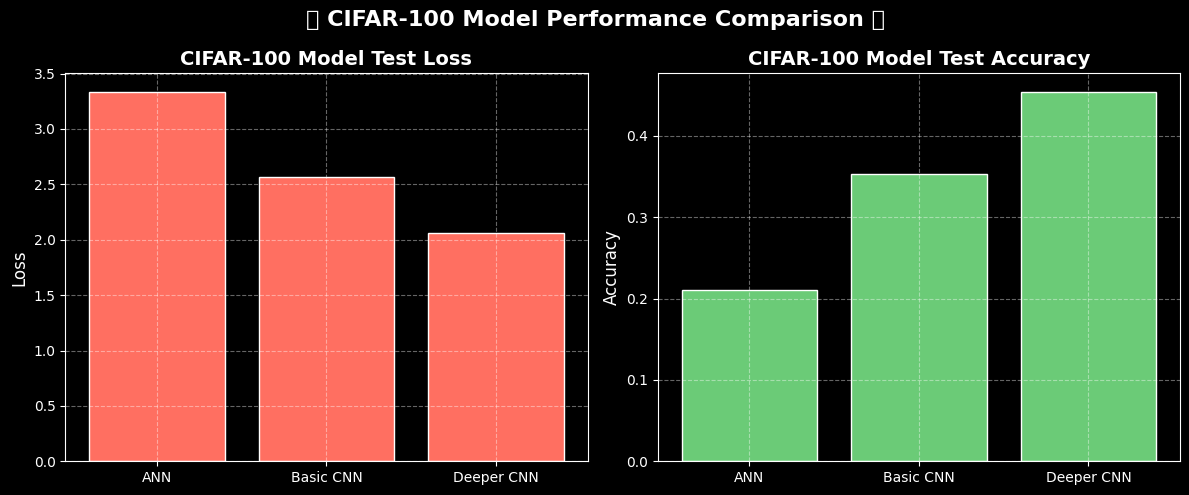

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the best weights
cifar100_ann_model.load_weights('best_cifar100_ann_model_weights.weights.h5')
cifar100_basic_cnn_model.load_weights('best_cifar100_basic_cnn_model_weights.weights.h5')
cifar100_deeper_cnn_model.load_weights('best_cifar100_deeper_cnn_model_weights.weights.h5')

# Evaluate models on the test set
loss_cifar100_ann, accuracy_cifar100_ann = cifar100_ann_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)
loss_cifar100_basic_cnn, accuracy_cifar100_basic_cnn = cifar100_basic_cnn_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)
loss_cifar100_deeper_cnn, accuracy_cifar100_deeper_cnn = cifar100_deeper_cnn_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)

# Data for plotting
models = ['ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_cifar100_ann, loss_cifar100_basic_cnn, loss_cifar100_deeper_cnn]
accuracies = [accuracy_cifar100_ann, accuracy_cifar100_basic_cnn, accuracy_cifar100_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('CIFAR-100 Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('CIFAR-100 Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ CIFAR-100 Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

#### 4.2) Model Evaluation (Confusion Matrix & Report)

- Predict test images for each model (ANN, Basic CNN, Deeper CNN).
- Convert one-hot labels to integers.
- Get predicted labels with `argmax`.
- Generate and plot the confusion matrix for each model.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


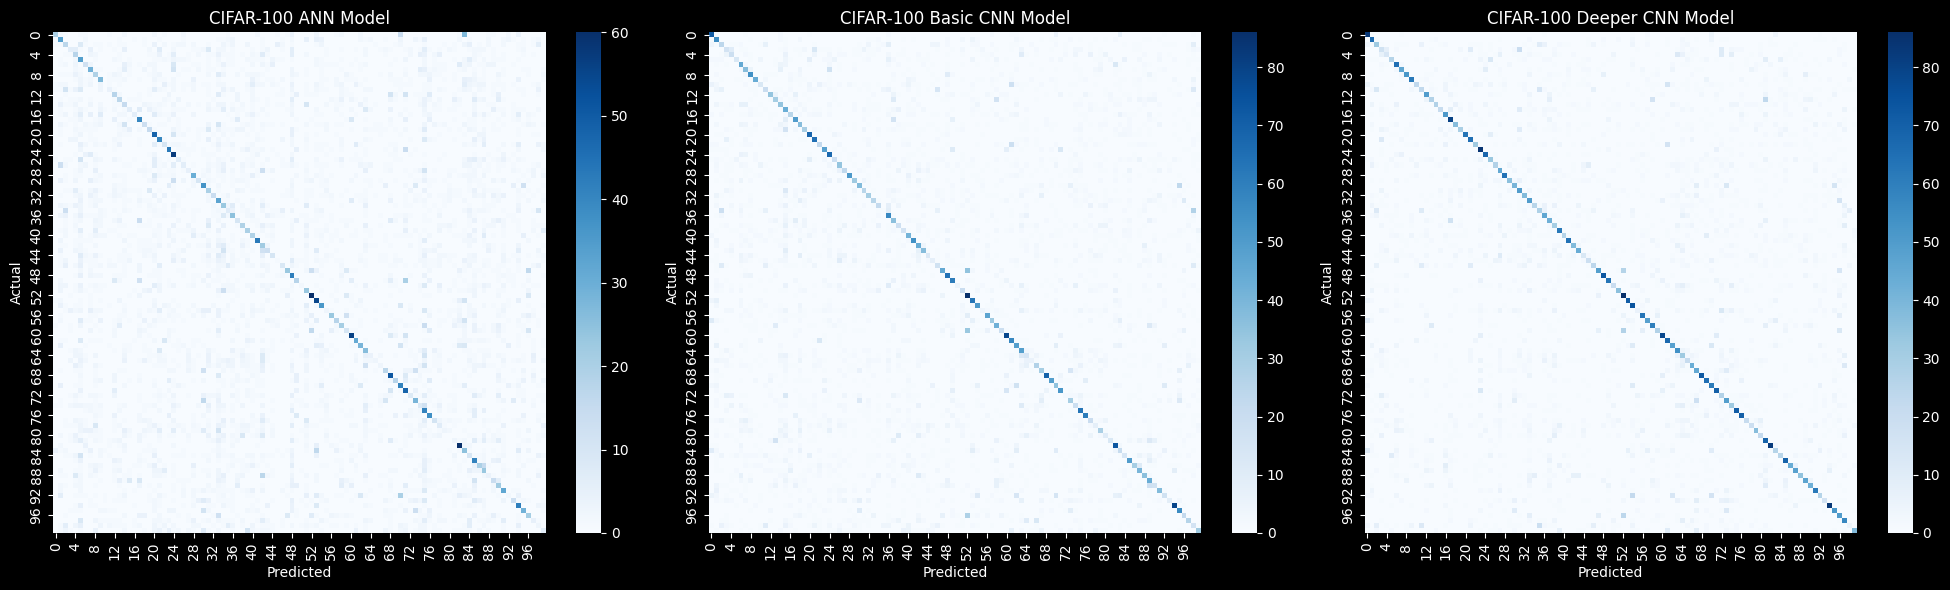

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predictions
cifar100_ann_predictions = cifar100_ann_model.predict(cifar100_test_images)
cifar100_basic_cnn_predictions = cifar100_basic_cnn_model.predict(cifar100_test_images)
cifar100_deeper_cnn_predictions = cifar100_deeper_cnn_model.predict(cifar100_test_images)

# Convert labels
cifar100_test_labels_int = np.argmax(cifar100_test_labels_one_hot, axis=1)

cifar100_ann_predicted_labels = np.argmax(cifar100_ann_predictions, axis=1)
cifar100_basic_cnn_predicted_labels = np.argmax(cifar100_basic_cnn_predictions, axis=1)
cifar100_deeper_cnn_predicted_labels = np.argmax(cifar100_deeper_cnn_predictions, axis=1)

# Confusion matrices
cm_cifar100_ann = confusion_matrix(cifar100_test_labels_int, cifar100_ann_predicted_labels)
cm_cifar100_basic = confusion_matrix(cifar100_test_labels_int, cifar100_basic_cnn_predicted_labels)
cm_cifar100_deeper = confusion_matrix(cifar100_test_labels_int, cifar100_deeper_cnn_predicted_labels)

# Plot side by side (using subplots)
fig, axes = plt.subplots(1, 3, figsize=(20, 6)) # Adjusted figsize for potentially larger matrices

sns.heatmap(cm_cifar100_ann, annot=False, fmt="d", cmap="Blues", ax=axes[0]) # annot=False due to large number of classes
axes[0].set_title("CIFAR-100 ANN Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_cifar100_basic, annot=False, fmt="d", cmap="Blues", ax=axes[1]) # annot=False due to large number of classes
axes[1].set_title("CIFAR-100 Basic CNN Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_cifar100_deeper, annot=False, fmt="d", cmap="Blues", ax=axes[2]) # annot=False due to large number of classes
axes[2].set_title("CIFAR-100 Deeper CNN Model")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Print classification reports (optional, as it can be long)
# print("\nClassification Report for ANN Model:")
# print(classification_report(cifar100_test_labels_int, cifar100_ann_predicted_labels))

# print("\nClassification Report for Basic CNN Model:")
# print(classification_report(cifar100_test_labels_int, cifar100_basic_cnn_predicted_labels))

# print("\nClassification Report for Deeper CNN Model:")
# print(classification_report(cifar100_test_labels_int, cifar100_deeper_cnn_predicted_labels))

#### 4.3) Model Comparison

- Created a dataframe to store **test loss** and **test accuracy** for ANN, Basic CNN, and Deeper CNN.
- Plotted training history for each model (accuracy & loss vs. epochs).
- Helps compare how models learn and generalize over time.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "ANN": ("cyan", cifar100_ann_history),
    "Basic CNN": ("magenta", cifar100_basic_cnn_history),
    "Deeper CNN": ("yellow", cifar100_deeper_cnn_history)
}

performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_cifar100_ann, loss_cifar100_basic_cnn, loss_cifar100_deeper_cnn],
    'Test Accuracy': [accuracy_cifar100_ann, accuracy_cifar100_basic_cnn, accuracy_cifar100_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)
display(performance_df)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="CIFAR-100 Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

,Model,Test Loss,Test Accuracy
0,ANN,3.335774,0.2109
1,Basic CNN,2.569916,0.3532
2,Deeper CNN,2.058431,0.4543


### 5. Prediction Analysis (CIFAR-100)

#### 5.1) Analyze Predictions

- Use the trained **Deeper CNN model** to predict on test images.
- Identify **correctly** and **incorrectly** classified samples.
- Randomly select a mix of correct and incorrect predictions to display.
- Visualize these predictions in a grid, indicating whether the prediction was correct or incorrect and showing the predicted and true labels for incorrect predictions.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


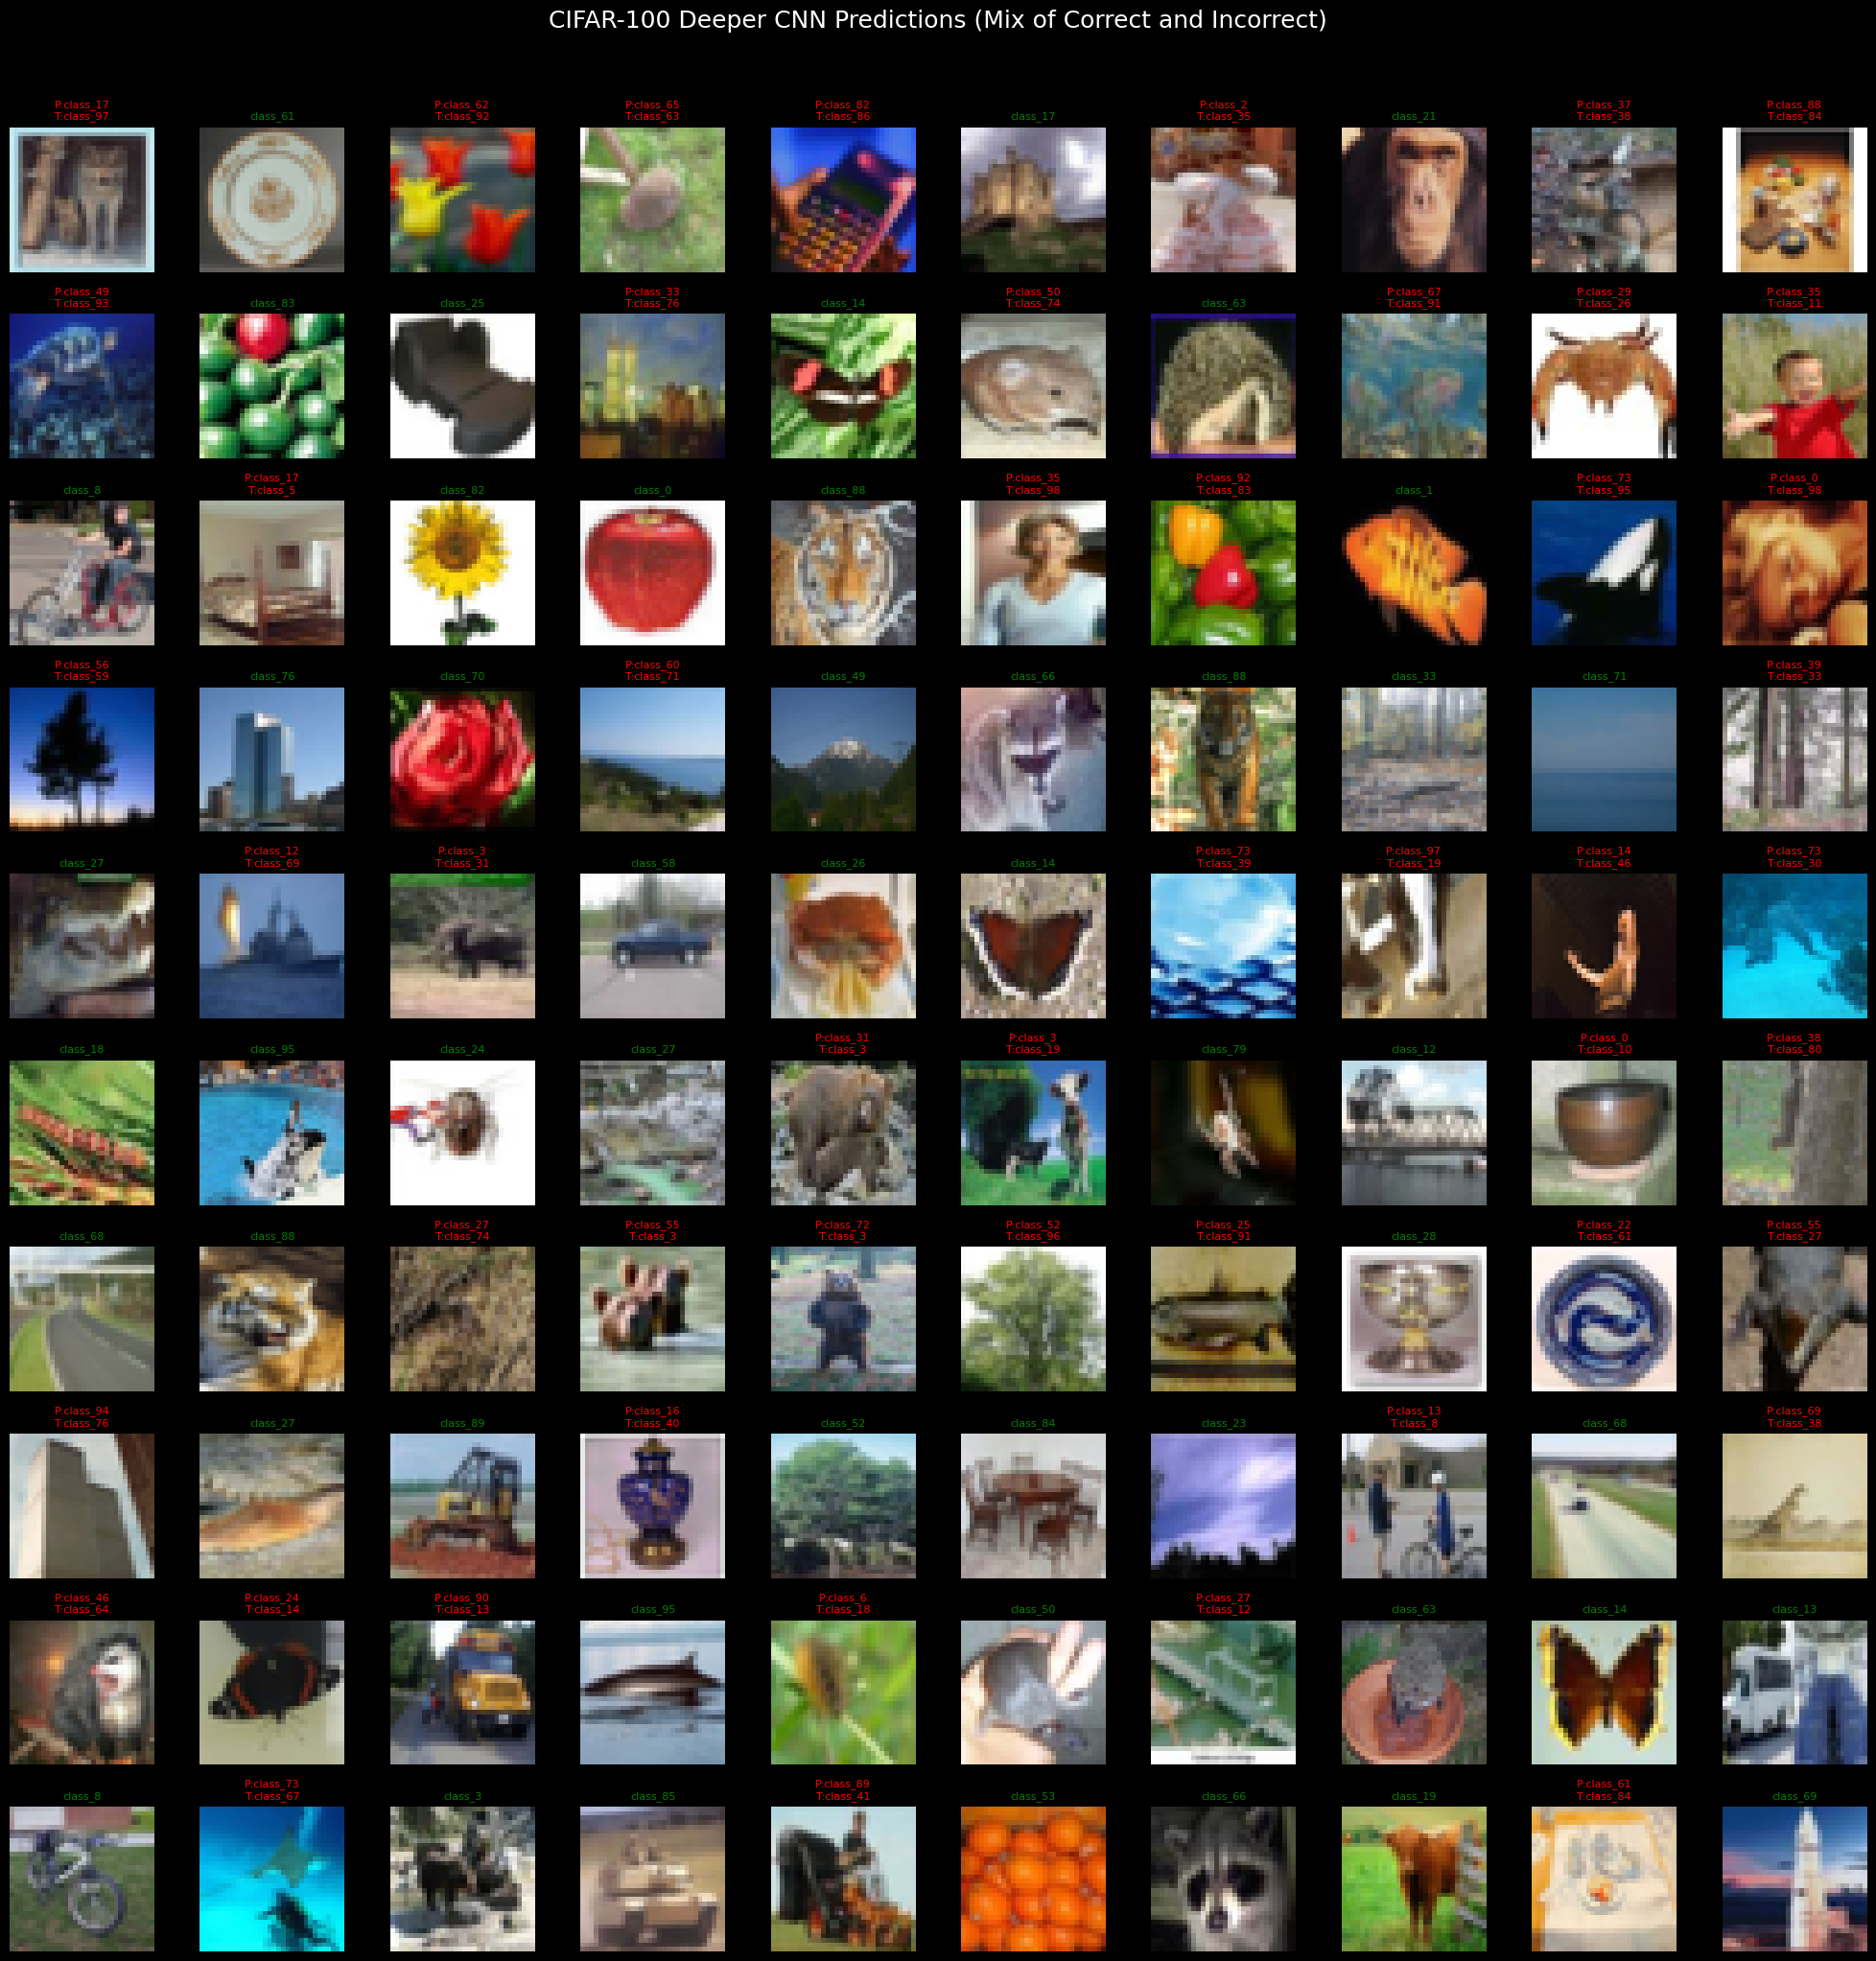

In [ ]:
# Define CIFAR-100 class names (replace with actual class names if you have them)
# For simplicity, we'll use generic class labels 0-99
cifar100_class_names = [f'class_{i}' for i in range(100)]


# Predictions using the best model (Deeper CNN)
cifar100_deeper_cnn_predictions = cifar100_deeper_cnn_model.predict(cifar100_test_images)
cifar100_deeper_cnn_predicted_labels = np.argmax(cifar100_deeper_cnn_predictions, axis=1)

# Find correctly and incorrectly classified images
correctly_classified_indices_cifar100 = np.where(cifar100_deeper_cnn_predicted_labels == cifar100_test_labels.flatten())[0]
incorrectly_classified_indices_cifar100 = np.where(cifar100_deeper_cnn_predicted_labels != cifar100_test_labels.flatten())[0]

# Select a mix of correctly and incorrectly classified images
num_correct_to_show = 50
num_incorrect_to_show = 50

# Ensure we don't try to show more images than available
num_correct_to_show = min(num_correct_to_show, len(correctly_classified_indices_cifar100))
num_incorrect_to_show = min(num_incorrect_to_show, len(incorrectly_classified_indices_cifar100))

selected_correct_indices_cifar100 = np.random.choice(correctly_classified_indices_cifar100, num_correct_to_show, replace=False)
selected_incorrect_indices_cifar100 = np.random.choice(incorrectly_classified_indices_cifar100, num_incorrect_to_show, replace=False)

# Combine and shuffle the indices
all_indices_cifar100 = np.concatenate((selected_correct_indices_cifar100, selected_incorrect_indices_cifar100))
np.random.shuffle(all_indices_cifar100)

# Display images in a grid
num_cols = 10
num_rows = (num_correct_to_show + num_incorrect_to_show) // num_cols
if (num_correct_to_show + num_incorrect_to_show) % num_cols != 0:
    num_rows += 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
fig.suptitle("CIFAR-100 Deeper CNN Predictions (Mix of Correct and Incorrect)", fontsize=18, y=1.02)

for i, idx in enumerate(all_indices_cifar100):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # CIFAR-100 images are color, so no need to reshape or use cmap='gray'
    ax.imshow(cifar100_test_images[idx])

    pred_label_idx = cifar100_deeper_cnn_predicted_labels[idx]
    true_label_idx = cifar100_test_labels.flatten()[idx]

    pred = cifar100_class_names[pred_label_idx]
    true = cifar100_class_names[true_label_idx]

    if pred_label_idx == true_label_idx:
        color = "green"
        title = f"{pred}"
    else:
        color = "red"
        title = f"P:{pred}\nT:{true}"

    ax.set_title(title, fontsize=8, color=color)
    ax.axis("off")

plt.tight_layout()
plt.show()

## Project Summary and Conclusion (CIFAR-100)

This project successfully applied the deep learning model architectures and training techniques from the Fashion-MNIST classification to the more challenging CIFAR-100 dataset.

**Summary of Work:**

1.  **Data Preparation:** The CIFAR-100 dataset was loaded, normalized, and one-hot encoded, adapting to its 32x32 color image format and 100 classes.
2.  **Model Adaptation:** The ANN, Basic CNN, and Deeper CNN architectures were modified to handle the CIFAR-100 input shape and output classes.
3.  **Model Training:** Each adapted model was trained on the CIFAR-100 training data using Early Stopping and Model Checkpointing.
4.  **Model Evaluation:** The trained models were evaluated on the CIFAR-100 test set, and their performance (loss and accuracy) was compared. Training history and confusion matrices were visualized.
5.  **Prediction Analysis:** Predictions from the best-performing Deeper CNN model were analyzed and visualized to understand its performance on individual images.

**Key Findings and Conclusion:**

Based on the evaluation results on the CIFAR-100 dataset:

*   The **Deeper CNN model** achieved the highest test accuracy and lowest test loss among the three models. This indicates that for a more complex dataset like CIFAR-100 with more classes and color images, a deeper architecture with additional layers and regularization techniques (Batch Normalization and Dropout) provides better performance compared to simpler models.
*   The **Basic CNN model** performed significantly better than the ANN model, reinforcing the importance of convolutional layers for image classification tasks, especially as dataset complexity increases.
*   The **ANN model** struggled considerably with the CIFAR-100 dataset, achieving a much lower accuracy compared to its performance on Fashion-MNIST. This highlights the limitations of simple feedforward networks for complex image data.

**Comparison with Fashion-MNIST Results:**

Comparing the results to the Fashion-MNIST project, we observe a clear trend:

*   All models achieved lower absolute accuracy on CIFAR-100 compared to Fashion-MNIST. This is expected as CIFAR-100 is a more challenging dataset with a higher number of classes and greater visual diversity.
*   The performance gap between the ANN and CNN models is more pronounced in the CIFAR-100 project. CNNs are better equipped to handle the spatial hierarchies and features present in more complex images.
*   In the Fashion-MNIST project, the Basic CNN was the best performer. However, for CIFAR-100, the **Deeper CNN** showed superior results. This suggests that as the complexity of the dataset increases, deeper and more sophisticated CNN architectures become more advantageous.

In conclusion, this project demonstrates that while basic CNN architectures offer significant improvements over ANNs for image classification, tackling more complex datasets like CIFAR-100 often requires deeper and more robust CNN models with techniques like Batch Normalization and Dropout to achieve better performance and generalization.